In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
image_path = '../output_videos/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

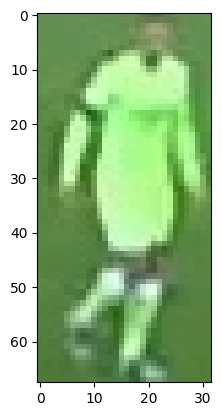

In [4]:
plt.imshow(image)
plt.show()

### Crop only the top part of the Image

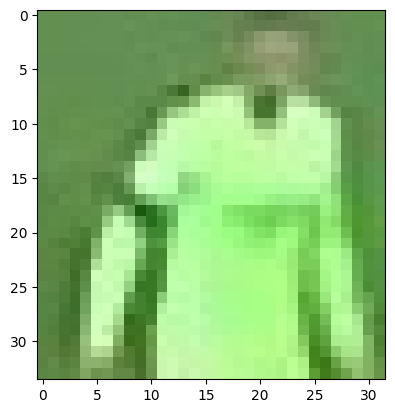

In [5]:
top_half_image = image[0 : int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

### Cluster the image into two clusters 

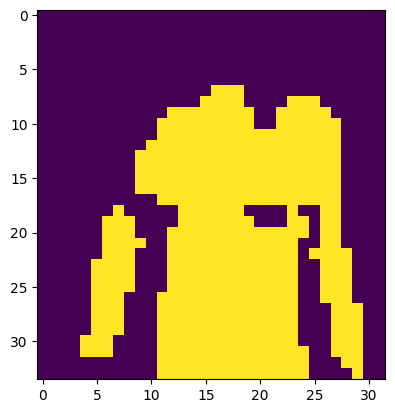

In [11]:
#Reshape the image into 2D Array
image_2d = top_half_image.reshape(-1,3)

#Using K-Means Clustering to create the clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

#Get the cluster labels
labels = kmeans.labels_

#Reshape the labels into original label shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

plt.imshow(clustered_image)
plt.show()

In [12]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [13]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [14]:
kmeans.cluster_centers_[player_cluster]

array([177.19910515, 244.72706935, 151.08948546])